In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding = 'latin1')

## Time Series Index

In [3]:
# Convert 'Date' to Datetime and set as index
df['Creation Date'] = pd.to_datetime(df['Creation Date'], dayfirst=True)
df.set_index('Creation Date',inplace = True)


In [4]:
df.index

DatetimeIndex(['2023-12-03', '2023-12-03', '2023-12-03', '2023-12-04',
               '2023-12-04', '2023-12-05', '2023-12-05', '2023-12-05',
               '2023-12-06', '2023-12-06',
               ...
               '2024-09-09', '2024-09-09', '2024-09-09', '2024-09-09',
               '2024-09-09', '2024-09-09', '2024-09-09', '2024-09-09',
               '2024-09-09', '2024-09-09'],
              dtype='datetime64[ns]', name='Creation Date', length=28623, freq=None)

In [5]:
df.loc['2025-1']['Revenue']


Creation Date
2025-01-01     39900
2025-01-01     39900
2025-01-01     39900
2025-01-01    478800
2025-01-01     39900
               ...  
2025-01-31     39900
2025-01-31     39900
2025-01-31     39900
2025-01-31     39900
2025-01-31     39900
Name: Revenue, Length: 2224, dtype: int64

In [6]:
df = df[df['Revenue'] != 0]
df = df.groupby(df.index).sum()

In [7]:
#Resampling to Monthly Frequancy and Calculate the mean closing price
df['Revenue'].resample('M').mean()

/tmp/ipykernel_41216/3542015835.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Revenue'].resample('M').mean()


Creation Date
2023-12-31    7.516393e+06
2024-01-31    1.600120e+07
2024-02-29    1.606188e+07
2024-03-31    1.570856e+07
2024-04-30    1.677202e+07
2024-05-31    1.685466e+07
2024-06-30    1.728508e+07
2024-07-31    1.723624e+07
2024-08-31    1.627605e+07
2024-09-30    1.697974e+07
2024-10-31    1.810537e+07
2024-11-30    1.599301e+07
2024-12-31    1.051991e+07
2025-01-31    3.818816e+06
Freq: ME, Name: Revenue, dtype: float64

## EDA

In [8]:
# Filter and make a copy to avoid SettingWithCopyWarning
df = df[df['Sales Method'] != 'Bundle'].copy()
df.loc['2025']['Sales Method'].unique()

array(['CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCode',
       'CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCode',
       'CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCode',
       'CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCod

<Axes: xlabel='Creation Date'>

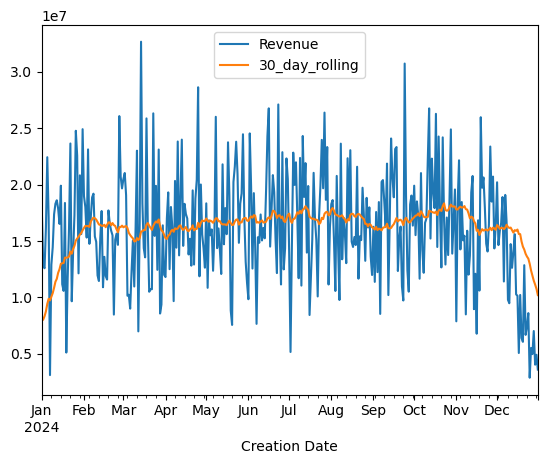

In [9]:
df = df[df['Revenue'] > 0] 
# Now safely calculate rolling average
df['30_day_rolling'] = df['Revenue'].rolling(window=30).mean()

# Plot for 2024
df[['Revenue', '30_day_rolling']].loc['2024'].plot()



In [10]:
# Extract Time Variables
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday
df['is_weekend'] = df.index.weekday > 4 # Check for weekend

df.head()

,Contract_ID,Gender,Age,Region,Managing Branch,Sales Unit,Selling branch,Sales Region,OrderID/RegCode,Transaction Code,...,Internet Package,Cancellation Date,Sales Method,30_day_rolling,year,month,day,weekday,weekday_numeric,is_weekend
Creation Date,,,,,,,,,,,,,,,,,,,,,
2023-12-03,SIM1000000952SIM1000003875SIM1000004226,0,109,04.Hai Phong06.Khanh Hoa10.Vung Tau,BTENBHBTN,OBBIBB,HBHDNISLA,13.Tay Nguyen - Mien Trung01.Ha Noi10.Vung Tau,SIMORDER952SIMORDER3875SIMORDER4226,0,...,Giga F1FTTH - Super500Sky,0,ExtraCodeCode,NaN,2023,12,3,Sunday,6,True
2023-12-04,SIM1000002839SIM1000003079,0,54,07.Ho Chi Minh06.Khanh Hoa,DLKHCM_03,OBBCBB,TGGHNI_02,02.Quang Ninh10.Vung Tau,SIMORDER2839SIMORDER3079,0,...,Meta F2FTTH - Super500,0,CodeCode,NaN,2023,12,4,Monday,0,False
2023-12-05,SIM1000001125SIM1000002091SIM1000004750,2,122,05.Da Nang05.Da Nang09.Binh Duong,CTOHCM_02HBH,IBBIBB,HPGHNI_05DKG,04.Hai Phong02.Quang Ninh08.Dong Nai,SIMORDER1125SIMORDER2091SIMORDER4750,0,...,Meta F2MetaGiga F1,0,CodeCodeCode,NaN,2023,12,5,Tuesday,1,False
2023-12-06,SIM1000000788SIM1000000842SIM1000001051SIM1000...,1,204,15.Tay Nam Bo03.Hai Duong14.Dong Nam Bo11.Tay ...,THAHYNHNI_03DKG,IBBCBBCBB,HNI_05HNI_02BTNBTN,12.Dong Bac Bo06.Khanh Hoa12.Dong Bac Bo10.Vun...,SIMORDER788SIMORDER842SIMORDER1051SIMORDER1774,0,...,SkyFTTH - Super500Giga - MultiFTTH - Super400,0,ExtraCodeCodeCode,NaN,2023,12,6,Wednesday,2,False
2023-12-08,SIM1000000782SIM1000001239SIM1000002650SIM1000...,4,183,09.Binh Duong04.Hai Phong14.Dong Nam Bo11.Tay ...,HCM_01HNMQTITNNPTO,OBBIBBIBB,VLGBTNLDGTBHHCM_06,14.Dong Nam Bo08.Dong Nai02.Quang Ninh03.Hai D...,SIMORDER782SIMORDER1239SIMORDER2650SIMORDER294...,0,...,Sky F3Sky F1FTTH - Super250Giga F1Sky F2,0,CodeCodeCodeExtraCode,NaN,2023,12,8,Friday,4,False


In [11]:
# Feature Enegineering - Lagged values
df['Revenue_lag1'] = df['Revenue'].shift(1)
df['Revenue_lag2'] = df['Revenue'].shift(2)

## Seasonal Decomposition

In [12]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
df['Revenue'].resample('M').mean()


/tmp/ipykernel_41216/1463569539.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Revenue'].resample('M').mean()


Creation Date
2023-12-31    7.516393e+06
2024-01-31    1.600120e+07
2024-02-29    1.606188e+07
2024-03-31    1.570856e+07
2024-04-30    1.677202e+07
2024-05-31    1.685466e+07
2024-06-30    1.728508e+07
2024-07-31    1.723624e+07
2024-08-31    1.627605e+07
2024-09-30    1.697974e+07
2024-10-31    1.810537e+07
2024-11-30    1.599301e+07
2024-12-31    1.051991e+07
2025-01-31    3.818816e+06
Freq: ME, Name: Revenue, dtype: float64

/tmp/ipykernel_41216/2711891604.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['Revenue'].resample('M').mean())


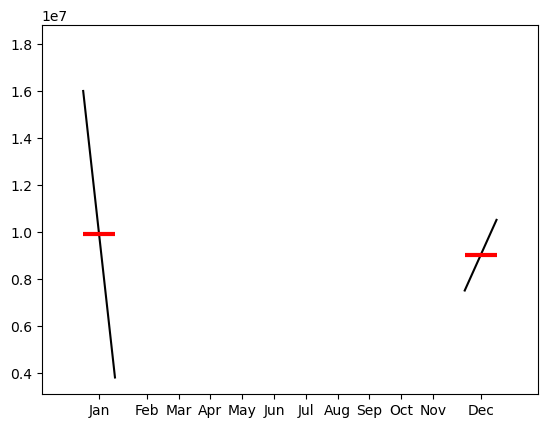

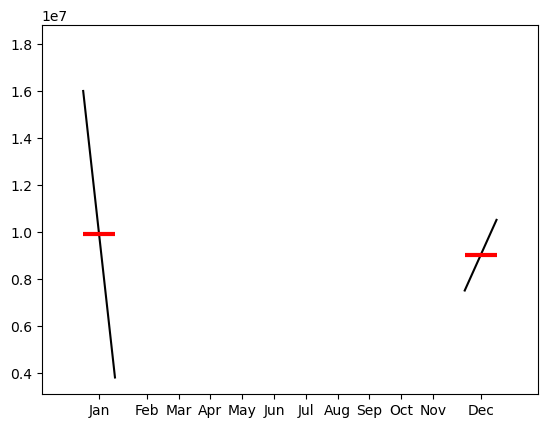

In [14]:
month_plot(df['Revenue'].resample('M').mean())

Due to the limited data range from December 2023 to January 2025, there is not enough information to identify or analyze seasonal patterns across months

<Axes: xlabel='Creation Date'>

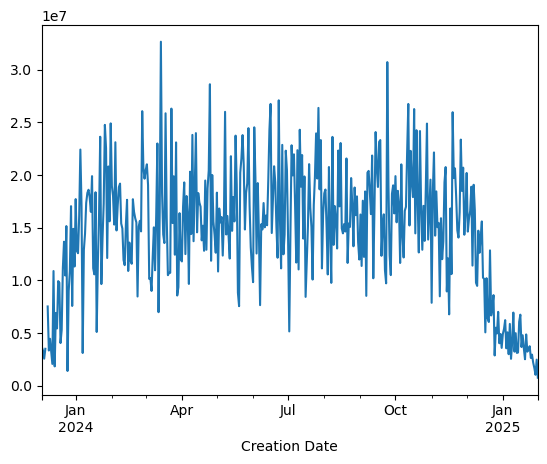

In [15]:
df['Revenue'].resample('D').mean().plot()


In [16]:
df.isnull().sum()


Contract_ID            0
Gender                 0
Age                    0
Region                 0
Managing Branch        0
Sales Unit             0
Selling branch         0
Sales Region           0
OrderID/RegCode        0
Transaction Code       0
Type                   0
FG Package Command     0
Payment Month          0
Revenue                0
Sales Channel          0
Status FGame           0
Active Date            0
Service Start Date     0
Service End Date       0
Internet Package       0
Cancellation Date      0
Sales Method           0
30_day_rolling        29
year                   0
month                  0
day                    0
weekday                0
weekday_numeric        0
is_weekend             0
Revenue_lag1           1
Revenue_lag2           2
dtype: int64

In [17]:
df['Revenue'] = df['Revenue'].replace(0, np.nan)
df['Revenue'] = df['Revenue'].interpolate()


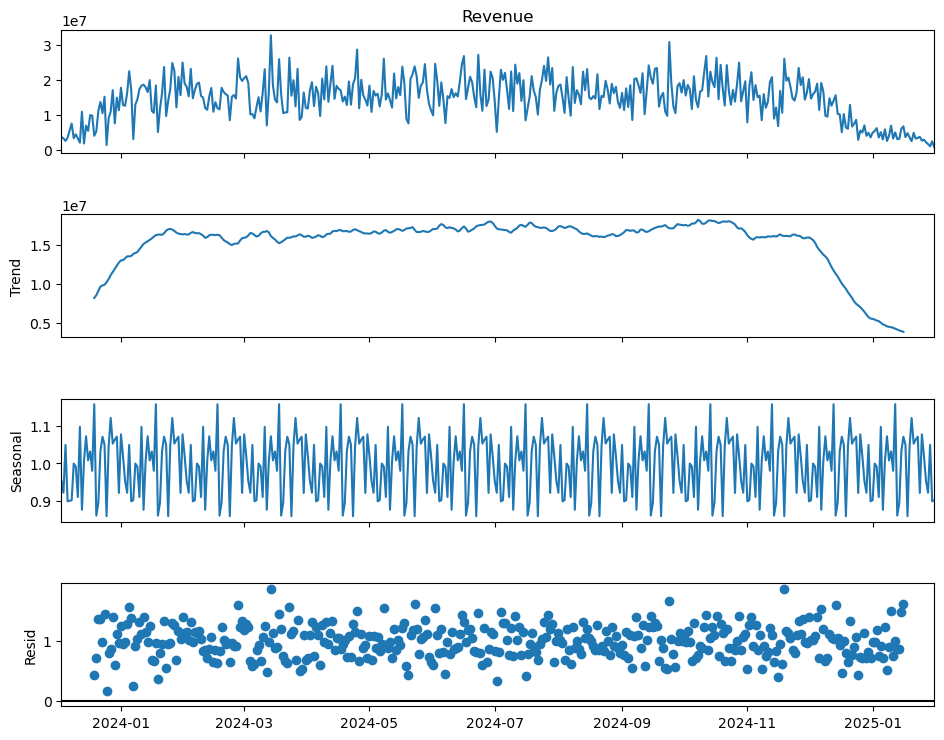

In [18]:
decomposition = seasonal_decompose(df['Revenue'], model='multiplicative', period=30)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()


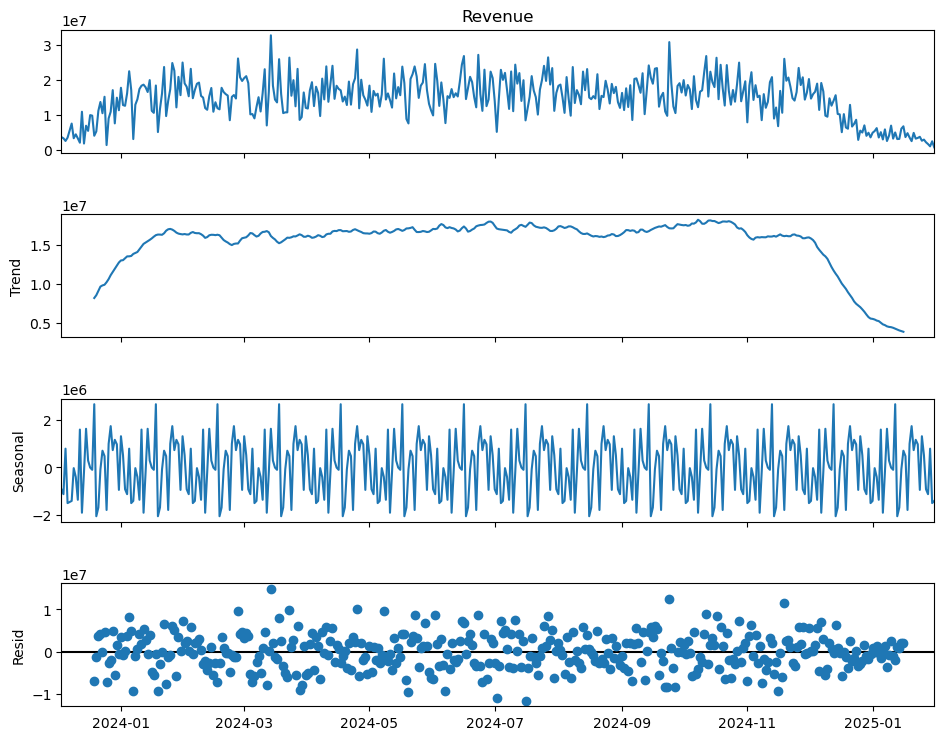

In [19]:
decomposition = seasonal_decompose(df['Revenue'], model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()


Multiplicative fits better:
- Cleaner seasonal pattern in the top figure (values around 1, not wildly swinging).
- Smaller residuals (closer to 1) → means the model explained more of the variation.
- Additive model's residuals are larger, showing it didn't explain the data as well.

## Auto Correlation (ACF)

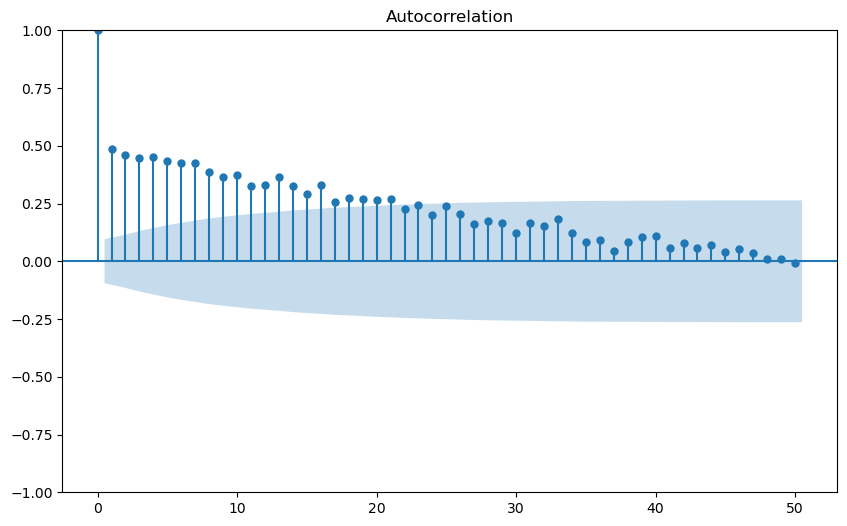

In [20]:
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['Revenue'], lags = 50 ,ax = ax)
plt.show()

## Forecasting - Prophet

11:20:29 - cmdstanpy - INFO - Chain [1] start processing
11:20:29 - cmdstanpy - INFO - Chain [1] done processing
/home/shadowfiend/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/shadowfiend/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


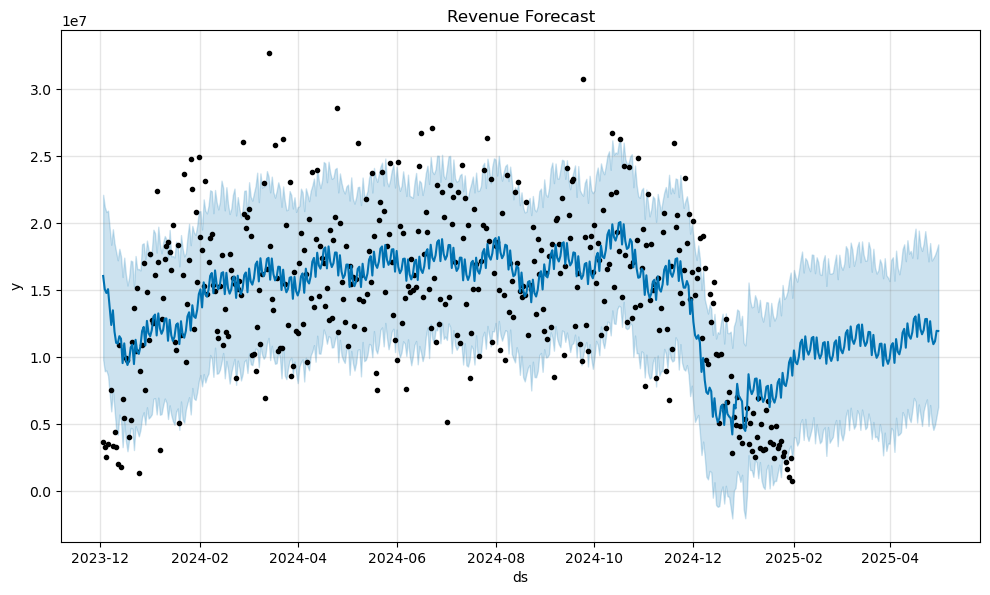

In [21]:
from prophet import Prophet
from prophet.serialize import model_to_json
from prophet.make_holidays import make_holidays_df

revenue_by_creation = df.groupby('Creation Date')['Revenue'].sum().reset_index()

# Rename columns for Prophet
revenue_by_creation.columns = ['ds', 'y']

holidays = pd.DataFrame({
  'holiday': 'year_end',
  'ds': pd.to_datetime(['2024-12-24', '2024-12-31', '2025-01-01']),
  'lower_window': 0,
  'upper_window': 2,
})

model = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=True)


# Fit the model
model.fit(revenue_by_creation)

# Make future dataframe (let's predict next 90 days)
future = model.make_future_dataframe(periods=90)

# Forecast
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title('Revenue Forecast')
plt.show()


/home/shadowfiend/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/shadowfiend/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/shadowfiend/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an nda

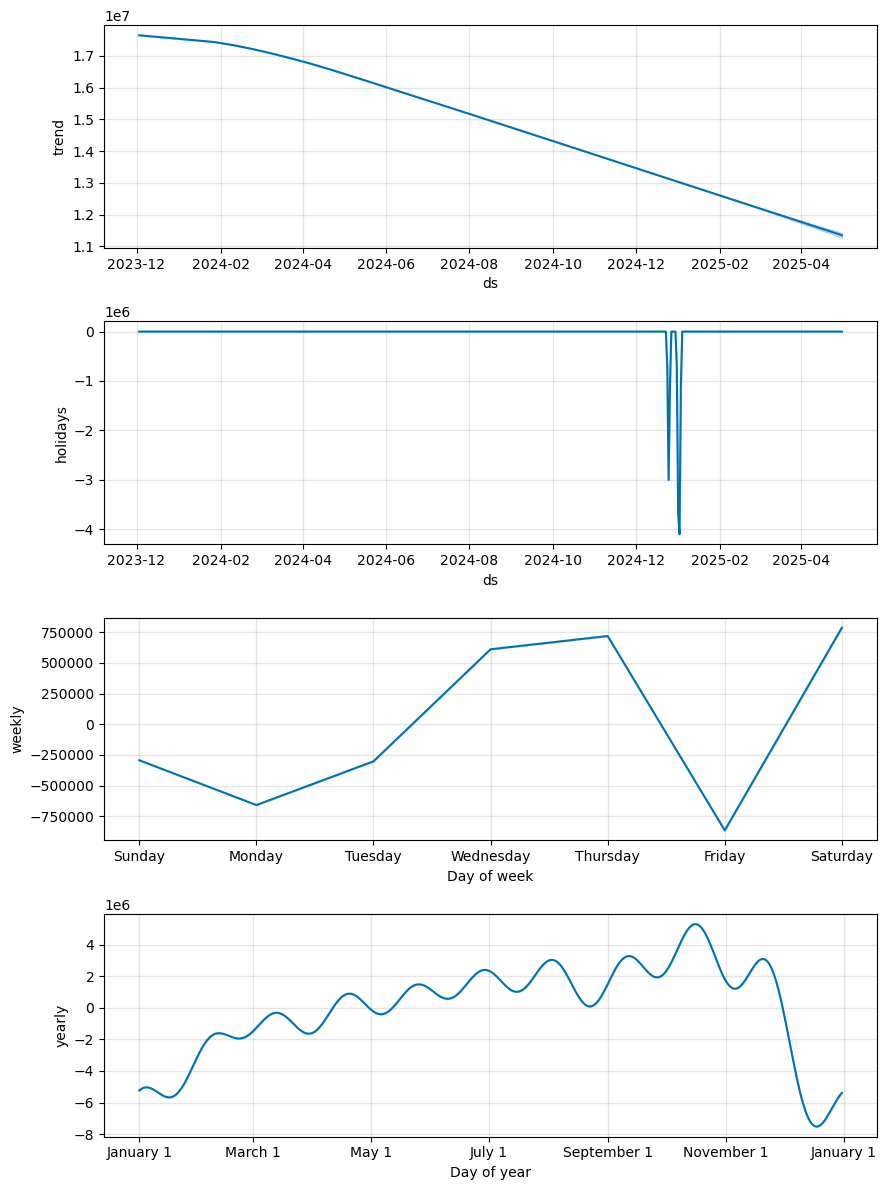

In [22]:
# Plot components (trend, weekly seasonality, yearly seasonality)
fig2 = model.plot_components(forecast)
plt.show()

In [23]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Step 1: Merge forecast with actuals
merged = forecast[['ds', 'yhat']].merge(revenue_by_creation, on='ds', how='inner')

# Step 2: Extract true and predicted values
y_true = merged['y']
y_pred = merged['yhat']

# Step 3: Define MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-8))) * 100

# Step 4: Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE:  3891460.80
RMSE: 4872365.68
MAPE: 46.00%


## Forecasting - LSTM

In [24]:
import pandas as pd
import torch
from torch import nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [25]:
# --------------------------
# Step 1: Load and preprocess data
# --------------------------
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding='latin1')
df["Creation Date"] = pd.to_datetime(df["Creation Date"], dayfirst=True)
df = df[df["Revenue"] > 0]
df = df.groupby("Creation Date")["Revenue"].sum().reset_index()
df = df.sort_values("Creation Date")

# Normalize revenue
scaler = StandardScaler()
df["Revenue_scaled"] = scaler.fit_transform(df[["Revenue"]])

# --------------------------
# Step 2: Create sliding window dataset
# --------------------------
class RevenueDataset(Dataset):
    def __init__(self, series, input_len=30, pred_len=7):
        self.X = []
        self.y = []
        for i in range(len(series) - input_len - pred_len):
            self.X.append(series[i:i+input_len])
            self.y.append(series[i+input_len:i+input_len+pred_len])
        self.X = torch.tensor(self.X, dtype=torch.float32).unsqueeze(-1)  # (N, T, 1)
        self.y = torch.tensor(self.y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

data_series = df["Revenue_scaled"].values
dataset = RevenueDataset(data_series, input_len=30, pred_len=7)

train_size = int(0.8 * len(dataset))
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# --------------------------
# Step 3: Define LSTM model
# --------------------------
class LSTMForecast(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_len=7):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_len)

    def forward(self, x):
        out, _ = self.lstm(x)         # out: [B, T, H]
        out = out[:, -1, :]           # Take last output
        out = self.linear(out)        # Predict next values
        return out

model = LSTMForecast()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# --------------------------
# Step 4: Train the model
# --------------------------
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

epochs = 30
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {total_loss/len(train_loader):.4f}")

# --------------------------
# Step 5: Evaluate and visualize
# --------------------------
model.eval()
X_sample, y_true = next(iter(val_loader))
X_sample = X_sample.to(device)
with torch.no_grad():
    y_pred = model(X_sample).cpu().numpy()

# Inverse scale to original revenue
y_pred_orig = scaler.inverse_transform(y_pred)
y_true_orig = scaler.inverse_transform(y_true.numpy())



/tmp/ipykernel_41216/1639758159.py:24: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647175880/work/torch/csrc/utils/tensor_new.cpp:278.)
  self.X = torch.tensor(self.X, dtype=torch.float32).unsqueeze(-1)  # (N, T, 1)


Epoch 1/30 - Train Loss: 0.8829
Epoch 2/30 - Train Loss: 0.8437
Epoch 3/30 - Train Loss: 0.7100
Epoch 4/30 - Train Loss: 0.6365
Epoch 5/30 - Train Loss: 0.6099
Epoch 6/30 - Train Loss: 0.5868
Epoch 7/30 - Train Loss: 0.5784
Epoch 8/30 - Train Loss: 0.5789
Epoch 9/30 - Train Loss: 0.5715
Epoch 10/30 - Train Loss: 0.5702
Epoch 11/30 - Train Loss: 0.5687
Epoch 12/30 - Train Loss: 0.5661
Epoch 13/30 - Train Loss: 0.5666
Epoch 14/30 - Train Loss: 0.5610
Epoch 15/30 - Train Loss: 0.5601
Epoch 16/30 - Train Loss: 0.5635
Epoch 17/30 - Train Loss: 0.5605
Epoch 18/30 - Train Loss: 0.5596
Epoch 19/30 - Train Loss: 0.5593
Epoch 20/30 - Train Loss: 0.5531
Epoch 21/30 - Train Loss: 0.5539
Epoch 22/30 - Train Loss: 0.5544
Epoch 23/30 - Train Loss: 0.5536
Epoch 24/30 - Train Loss: 0.5503
Epoch 25/30 - Train Loss: 0.5507
Epoch 26/30 - Train Loss: 0.5422
Epoch 27/30 - Train Loss: 0.5328
Epoch 28/30 - Train Loss: 0.5301
Epoch 29/30 - Train Loss: 0.5292
Epoch 30/30 - Train Loss: 0.5233


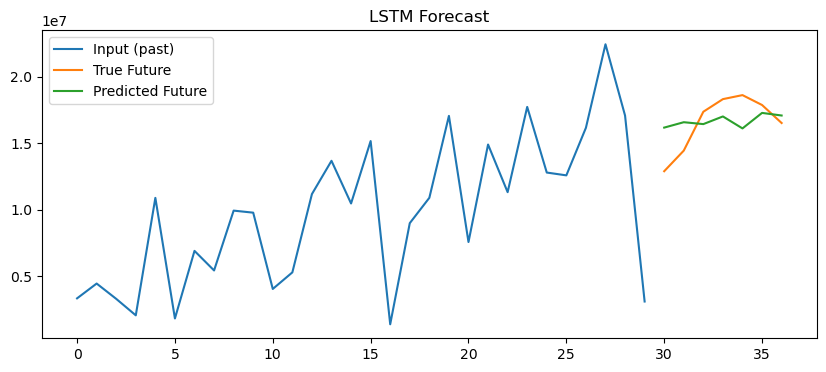

In [26]:
# Plot first sample
plt.figure(figsize=(10, 4))
plt.plot(range(30), scaler.inverse_transform(X_sample[0].cpu().numpy()).flatten(), label="Input (past)")
plt.plot(range(30, 37), y_true_orig[0], label="True Future")
plt.plot(range(30, 37), y_pred_orig[0], label="Predicted Future")
plt.title("LSTM Forecast")
plt.legend()
plt.show()

In [27]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid divide-by-zero
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-8))) * 100

# Flatten to compare all values across all batches
y_pred_all = y_pred_orig.flatten()
y_true_all = y_true_orig.flatten()

# MAE
mae = mean_absolute_error(y_true_all, y_pred_all)

# RMSE
rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))

# MAPE
mape = mean_absolute_percentage_error(y_true_all, y_pred_all)

# Show results
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE:  3644062.25
RMSE: 4663694.50
MAPE: 27.62%


## Combined between LSTM and Prophet